### yashar paymai 401100325
# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [16]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """

    weights1 = np.random.randn(input_size, hidden_size) * 0.1
    biases1 = np.zeros(hidden_size)
    weights2 = np.random.randn(hidden_size, output_size) * 0.1
    biases2 = np.zeros(output_size)
    parameters = {
        'W1': weights1,
        'b1': biases1,
        'W2': weights2,
        'b2': biases2
    }
    return parameters




TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [17]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0.0, x)


def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return np.where(x <= 0, 0, 1)


def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1.0 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    return sigmoid(x) * (1 - sigmoid(x))


def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)


def softmax_derivative(x):
    return softmax(x) * (1 - softmax(x))


TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [37]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    layers = len(parameters) // 2
    cache = {'A0': X}
    for i in range(1, layers + 1):
        cache[f'Z{i}'] = cache[f'A{i - 1}'] @ parameters[f'W{i}'] + parameters[f'b{i}']
        cache[f'A{i}'] = relu(cache[f'Z{i}'])
    return cache[f'A{layers}'], cache




TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [39]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    return -np.sum(y_true * np.log(y_pred + 0.00001)) / len(y_true)


def compute_accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))



TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [29]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """

    layers = len(parameters) // 2
    gradients = {}

    for i in range(layers, 0, -1):
        if i == layers:
            gradients[f'dZ{i}'] = cache[f'A{i}'] - y_true
        else:
            gradients[f'dZ{i}'] = gradients[f'dA{i}'] * relu_derivative(cache[f'Z{i}'])
        gradients[f'dW{i}'] = cache[f'A{i - 1}'].T @ gradients[f'dZ{i}'] / len(y_true)
        gradients[f'db{i}'] = np.sum(gradients[f'dZ{i}'], axis=0) / len(y_true)
        gradients[f'dA{i - 1}'] = gradients[f'dZ{i}'] @ parameters[f'W{i}'].T

    return gradients





TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [21]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    layers = len(parameters) // 2
    for i in range(1, layers + 1):
        parameters[f'W{i}'] -= learning_rate * gradients[f'dW{i}']
        parameters[f'b{i}'] -= learning_rate * gradients[f'db{i}']
    return parameters


TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.


Training with hidden size: 32
Epoch 10/50 - Loss: 6.9763 - Accuracy: 0.1454
Epoch 20/50 - Loss: 4.3499 - Accuracy: 0.2373
Epoch 30/50 - Loss: 3.4585 - Accuracy: 0.3347
Epoch 40/50 - Loss: 2.9915 - Accuracy: 0.4063
Epoch 50/50 - Loss: 2.6744 - Accuracy: 0.4584


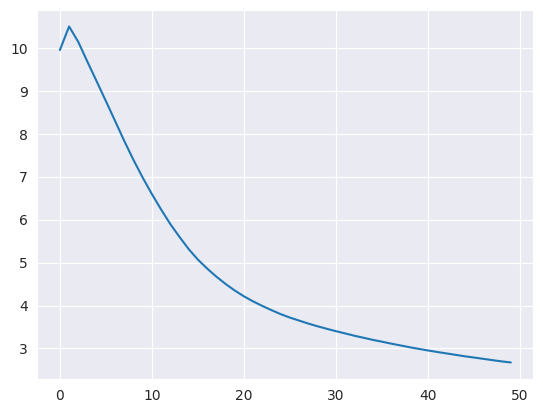


Training with hidden size: 64
Epoch 10/50 - Loss: 4.1376 - Accuracy: 0.3179
Epoch 20/50 - Loss: 2.9110 - Accuracy: 0.4625
Epoch 30/50 - Loss: 2.4521 - Accuracy: 0.5339
Epoch 40/50 - Loss: 2.1867 - Accuracy: 0.5761
Epoch 50/50 - Loss: 2.0187 - Accuracy: 0.6048


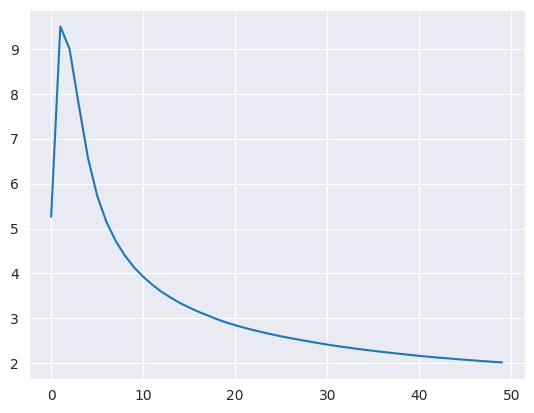


Training with hidden size: 128
Epoch 10/50 - Loss: 5.3380 - Accuracy: 0.3413
Epoch 20/50 - Loss: 3.2826 - Accuracy: 0.4884
Epoch 30/50 - Loss: 2.5434 - Accuracy: 0.5684
Epoch 40/50 - Loss: 2.2632 - Accuracy: 0.6103
Epoch 50/50 - Loss: 2.1030 - Accuracy: 0.6351


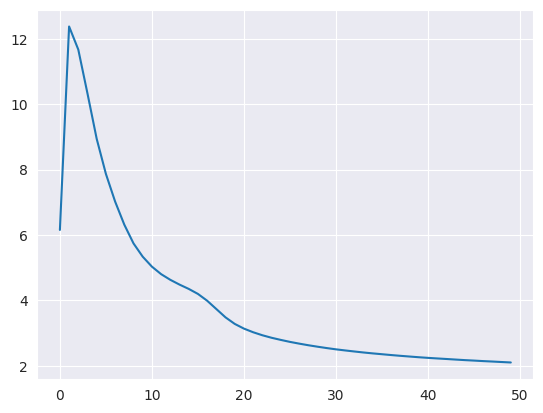

In [57]:
# Training Loop
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)
        loss_history.append(loss)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss:.4f} - Accuracy: {compute_accuracy(y_train, y_pred):.4f}')
    return loss_history


for hidden_size in [32, 64, 128]:
    print(f'\nTraining with hidden size: {hidden_size}')
    loss_history = train_model(x_train.reshape(-1, 784), y_train, hidden_size, learning_rate=0.03)
    plt.plot(loss_history, label=f'Hidden Size: {hidden_size}')
    plt.show()


TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [66]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {}
    s = {}
    t = 0
    for key, value in parameters.items():
        v[key] = np.zeros_like(value)
        s[key] = np.zeros_like(value)
    return v, s, t


def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999,
                                epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1
    for key in parameters.keys():
        v[key] = beta1 * v[key] + (1 - beta1) * gradients[f'd{key}']
        s[key] = beta2 * s[key] + (1 - beta2) * gradients[f'd{key}'] ** 2
        v_corrected = v[key] / (1 - beta1 ** t)
        s_corrected = s[key] / (1 - beta2 ** t)
        parameters[key] -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)
    return parameters, v, s, t


TODO: Implement Adam optimizer into the training loop.

In [68]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    v, s, t = initialize_adam(parameters)
    loss_history = []
    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        loss_history.append(loss)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss:.4f} - Accuracy: {compute_accuracy(y_train, y_pred):.4f}')
    return loss_history


loss = train_model_with_adam(x_train.reshape(-1, 784), y_train, 128, epochs=50, learning_rate=0.01)

Epoch 10/50 - Loss: 9.4146 - Accuracy: 0.3221
Epoch 20/50 - Loss: 5.8848 - Accuracy: 0.4880
Epoch 30/50 - Loss: 3.2793 - Accuracy: 0.6734
Epoch 40/50 - Loss: 1.7538 - Accuracy: 0.7365
Epoch 50/50 - Loss: 1.3557 - Accuracy: 0.7707


### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [69]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {}
    for key, value in parameters.items():
        s[key] = np.zeros_like(value)
    return s


def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters.keys():
        s[key] = beta * s[key] + (1 - beta) * gradients[f'd{key}'] ** 2
        parameters[key] -= learning_rate * gradients[f'd{key}'] / (np.sqrt(s[key]) + epsilon)
    return parameters, s



TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [71]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.003, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    if optimizer == 'adam':
        return train_model_with_adam(X_train, y_train, hidden_size, epochs, learning_rate)

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    s = initialize_rmsprop(parameters)
    loss_history = []
    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate)
        loss_history.append(loss)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss:.4f} - Accuracy: {compute_accuracy(y_train, y_pred):.4f}')
    return loss_history


loss = train_model(x_train.reshape(-1, 784), y_train, 128, epochs=50, learning_rate=0.003, optimizer='rmsprop')

Epoch 10/50 - Loss: 7.8485 - Accuracy: 0.4468
Epoch 20/50 - Loss: 2.5257 - Accuracy: 0.6381
Epoch 30/50 - Loss: 4.0890 - Accuracy: 0.6141
Epoch 40/50 - Loss: 3.1899 - Accuracy: 0.6589
Epoch 50/50 - Loss: 0.8166 - Accuracy: 0.7392


TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

Training with Adam optimizer
Epoch 10/100 - Loss: 6.3888 - Accuracy: 0.3609
Epoch 20/100 - Loss: 2.5675 - Accuracy: 0.6255
Epoch 30/100 - Loss: 2.0234 - Accuracy: 0.6973
Epoch 40/100 - Loss: 1.7168 - Accuracy: 0.7322
Epoch 50/100 - Loss: 1.4129 - Accuracy: 0.7583
Epoch 60/100 - Loss: 1.3721 - Accuracy: 0.7740
Epoch 70/100 - Loss: 1.2675 - Accuracy: 0.7870
Epoch 80/100 - Loss: 1.1710 - Accuracy: 0.7971
Epoch 90/100 - Loss: 1.1037 - Accuracy: 0.8059
Epoch 100/100 - Loss: 1.0594 - Accuracy: 0.8117

Training with RMSprop optimizer
Epoch 10/100 - Loss: 2.5261 - Accuracy: 0.5371
Epoch 20/100 - Loss: 2.7322 - Accuracy: 0.6596
Epoch 30/100 - Loss: 1.7455 - Accuracy: 0.6962
Epoch 40/100 - Loss: 2.4580 - Accuracy: 0.7084
Epoch 50/100 - Loss: 2.0623 - Accuracy: 0.7301
Epoch 60/100 - Loss: 1.4109 - Accuracy: 0.7447
Epoch 70/100 - Loss: 1.2202 - Accuracy: 0.7742
Epoch 80/100 - Loss: 0.9190 - Accuracy: 0.7846
Epoch 90/100 - Loss: 1.4995 - Accuracy: 0.7801
Epoch 100/100 - Loss: 1.0415 - Accuracy: 0.7

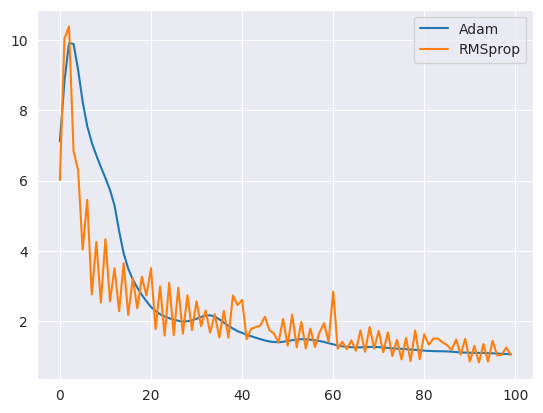

In [74]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    print('Training with Adam optimizer')
    loss_adam = train_model(X_train, y_train, hidden_size, epochs, optimizer='adam')
    print('\nTraining with RMSprop optimizer')
    loss_rmsprop = train_model(X_train, y_train, hidden_size, epochs, optimizer='rmsprop')
    plt.plot(loss_adam, label='Adam')
    plt.plot(loss_rmsprop, label='RMSprop')
    plt.legend()
    plt.show()


compare_optimizers(x_train.reshape(-1, 784), y_train, 128, epochs=100)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [76]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """

    for key in parameters.keys():
        parameters[key] -= learning_rate * gradients[f'd{key}']

    return parameters



2. Modify the Training Loop


In [102]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        loss_history.append(loss)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss:.4f} - Accuracy: {compute_accuracy(y_train, y_pred):.4f}')

    return loss_history



3. Experiment with Different Learning Rates



Training with learning rate: 0.001
Epoch 10/50 - Loss: 5.9504 - Accuracy: 0.1177
Epoch 20/50 - Loss: 7.1735 - Accuracy: 0.1359
Epoch 30/50 - Loss: 7.6819 - Accuracy: 0.1460
Epoch 40/50 - Loss: 7.8806 - Accuracy: 0.1558
Epoch 50/50 - Loss: 7.9053 - Accuracy: 0.1661

Training with learning rate: 0.01
Epoch 10/50 - Loss: 6.5805 - Accuracy: 0.2308
Epoch 20/50 - Loss: 4.5383 - Accuracy: 0.3422
Epoch 30/50 - Loss: 3.7213 - Accuracy: 0.4150
Epoch 40/50 - Loss: 3.2853 - Accuracy: 0.4660
Epoch 50/50 - Loss: 3.0218 - Accuracy: 0.5030

Training with learning rate: 0.1
Epoch 10/50 - Loss: 3.6122 - Accuracy: 0.5569
Epoch 20/50 - Loss: 2.3975 - Accuracy: 0.6208
Epoch 30/50 - Loss: 1.7540 - Accuracy: 0.6698
Epoch 40/50 - Loss: 1.5607 - Accuracy: 0.6953
Epoch 50/50 - Loss: 1.4438 - Accuracy: 0.7111


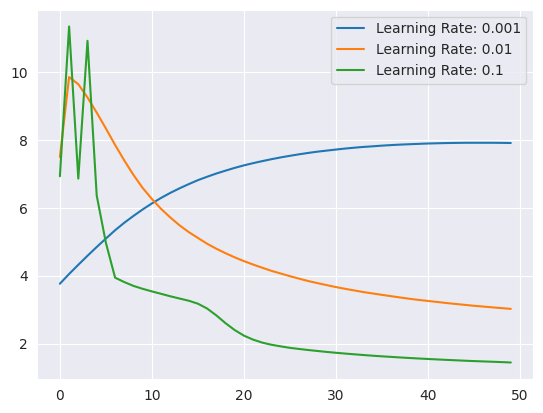

In [103]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    for learning_rate in learning_rates:
        print(f'\nTraining with learning rate: {learning_rate}')
        loss_history = train_model_with_sgd(X_train, y_train, hidden_size, epochs, learning_rate)
        plt.plot(loss_history, label=f'Learning Rate: {learning_rate}')

    plt.legend()


compare_learning_rates(x_train.reshape(-1, 784), y_train, 128, epochs=50)

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [104]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {}
    for key, value in parameters.items():
        v[key] = np.zeros_like(value)
    return v


def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    for key in parameters.keys():
        v[key] = beta * v[key] + (1 - beta) * gradients[f'd{key}']
        parameters[key] -= learning_rate * v[key]
    return parameters, v


3. Modify the Training Loop


In [108]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    if optimizer == 'sgd':
        return train_model_with_sgd(X_train, y_train, hidden_size, epochs, learning_rate)

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    v = initialize_momentum(parameters)
    loss_history = []
    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)
        loss_history.append(loss)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss:.4f} - Accuracy: {compute_accuracy(y_train, y_pred):.4f}')
    return loss_history

4. Train the Model with Both Optimizers


Training with Classic SGD
Epoch 10/50 - Loss: 7.7621 - Accuracy: 0.1802
Epoch 20/50 - Loss: 5.6135 - Accuracy: 0.2891
Epoch 30/50 - Loss: 4.5981 - Accuracy: 0.3803
Epoch 40/50 - Loss: 3.9929 - Accuracy: 0.4451
Epoch 50/50 - Loss: 3.5929 - Accuracy: 0.4914

Training with SGD with Momentum
Epoch 10/50 - Loss: 10.8987 - Accuracy: 0.1409
Epoch 20/50 - Loss: 10.8284 - Accuracy: 0.1478
Epoch 30/50 - Loss: 7.1986 - Accuracy: 0.2461
Epoch 40/50 - Loss: 4.5280 - Accuracy: 0.3352
Epoch 50/50 - Loss: 4.1923 - Accuracy: 0.3968


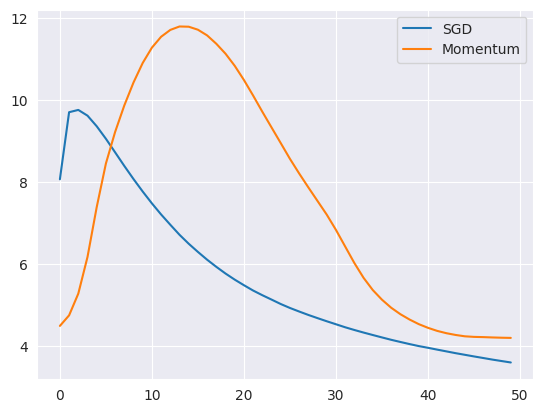

In [111]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """

    print('Training with Classic SGD')
    loss_sgd = train_model(X_train, y_train, hidden_size, epochs, optimizer='sgd', learning_rate=learning_rate)

    print('\nTraining with SGD with Momentum')
    loss_momentum = train_model(X_train, y_train, hidden_size, epochs, optimizer='momentum',
                                learning_rate=learning_rate)

    plt.plot(loss_sgd, label='SGD')
    plt.plot(loss_momentum, label='Momentum')
    plt.legend()
    plt.show()


compare_sgd_and_momentum(x_train.reshape(-1, 784), y_train, 128, epochs=50)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [112]:
def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    for epoch in range(epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]
            y_pred, cache = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(X_batch, y_batch, parameters, cache)
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        y_pred, _ = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        loss_history.append(loss)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss:.4f} - Accuracy: {compute_accuracy(y_train, y_pred):.4f}')
    return loss_history


2. Train the Model with Different Mini-Batch Sizes


In [114]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    for batch_size in batch_sizes:
        print(f'\nTraining with mini-batch size: {batch_size}')
        loss_history = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, batch_size=batch_size)
        print(f'Final Loss for batch size {batch_size}: {loss_history[-1]:.4f}')


compare_mini_batch_sizes(x_train.reshape(-1, 784), y_train, 128, epochs=50)


Training with mini-batch size: 16
Epoch 10/50 - Loss: 0.5200 - Accuracy: 0.8728
Epoch 20/50 - Loss: 0.4513 - Accuracy: 0.8878
Epoch 30/50 - Loss: 0.4066 - Accuracy: 0.8975
Epoch 40/50 - Loss: 0.3806 - Accuracy: 0.9049
Epoch 50/50 - Loss: 0.3575 - Accuracy: 0.9109
Final Loss for batch size 16: 0.3575

Training with mini-batch size: 32
Epoch 10/50 - Loss: 0.5868 - Accuracy: 0.8596
Epoch 20/50 - Loss: 0.5151 - Accuracy: 0.8740
Epoch 30/50 - Loss: 0.4748 - Accuracy: 0.8822
Epoch 40/50 - Loss: 0.4451 - Accuracy: 0.8883
Epoch 50/50 - Loss: 0.4212 - Accuracy: 0.8939
Final Loss for batch size 32: 0.4212

Training with mini-batch size: 64
Epoch 10/50 - Loss: 0.6977 - Accuracy: 0.8455
Epoch 20/50 - Loss: 0.6125 - Accuracy: 0.8608
Epoch 30/50 - Loss: 0.5668 - Accuracy: 0.8700
Epoch 40/50 - Loss: 0.5309 - Accuracy: 0.8764
Epoch 50/50 - Loss: 0.5037 - Accuracy: 0.8815
Final Loss for batch size 64: 0.5037


### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [115]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """

    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []
    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train, parameters)
        loss = compute_loss(y_train, y_pred)
        gradients = backward_propagation(X_train, y_train, parameters, cache)
        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)
        loss_history.append(loss)
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{epochs} - Loss: {loss:.4f} - Accuracy: {compute_accuracy(y_train, y_pred):.4f}')
    return loss_history


In [117]:
import time
def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """

    print('Training with Mini-Batch Gradient Descent')
    start_time = time.time()
    _ = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, batch_size=batch_size)
    end_time = time.time()
    print(f'Training time (Mini-Batch): {end_time - start_time} seconds')

    print()
    print('Training with Full-Batch Gradient Descent')
    start_time = time.time()
    _ = train_model_full_batch(X_train, y_train, hidden_size, epochs)
    end_time = time.time()
    print(f'Training time (Full-Batch): {end_time - start_time} seconds')
    
compare_mini_batch_and_full_batch(x_train.reshape(-1, 784), y_train, 128, epochs=50)

Training with Mini-Batch Gradient Descent
Epoch 10/50 - Loss: 0.6206 - Accuracy: 0.8603
Epoch 20/50 - Loss: 0.5318 - Accuracy: 0.8748
Epoch 30/50 - Loss: 0.4871 - Accuracy: 0.8840
Epoch 40/50 - Loss: 0.4528 - Accuracy: 0.8903
Epoch 50/50 - Loss: 0.4304 - Accuracy: 0.8957
Training time (Mini-Batch): 106.56106281280518 seconds

Training with Full-Batch Gradient Descent
Epoch 10/50 - Loss: 7.0721 - Accuracy: 0.2200
Epoch 20/50 - Loss: 5.3200 - Accuracy: 0.3179
Epoch 30/50 - Loss: 4.3610 - Accuracy: 0.4053
Epoch 40/50 - Loss: 3.8261 - Accuracy: 0.4588
Epoch 50/50 - Loss: 3.4656 - Accuracy: 0.4931
Training time (Full-Batch): 42.8223979473114 seconds
